In [ ]:
##===========##
##  Imports  ##
##===========##

import ast, logging, random, sys, time

import matplotlib as mpl
import numpy      as np
import pandas     as pd
import tensorflow as tf

from matplotlib import pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving combinationsHalfOfAll4by4s.csv to combinationsHalfOfAll4by4s.csv


In [ ]:
##====================================##
##  Config (no hard-coded variables)  ##
##====================================##

config = {
    "general" : {
        "base_seed"  : -1,
        "board_size" : 4,
    },
    "data" : {
        "input_fname"      : "combinationsHalfOfAll4by4s.csv",
    },
    "model" : {
        "ndim"              : 128,
        "encoder_depth"     : 4,
        "encoder_num_heads" : 8,
        "encoder_do_MLP"    : True,
        "decoder_depth"     : 4,
        "decoder_num_heads" : 8,
        "decoder_do_MLP"    : True,
        "MLP_depth"         : 3,
        "use_bias"          : True,
        "learning_rate"     : 1e-5,
    },
    "training" : {
        "epochs"           : 100,
        "batch_size"       : 32,
        "patience"         : 20,
        "validation_split" : 0.2,
    },
}

In [ ]:
##=====================##
##  Configure logging  ##
##=====================##

##  Get named logger
logger = logging.getLogger(__name__)

##  Add output handler to stdout
io_handler = logging.StreamHandler(sys.stdout)
io_handler.setFormatter(logging.Formatter("%(levelname)7s %(asctime)s: %(message)s", "%Y-%m-%d %H:%M:%S"))
io_handler.setLevel(logging.INFO)
logger.setLevel(logging.INFO)
logger.addHandler(io_handler)

##  Test that we see output
logger.info(f"Configured for logger '{logger.name}'")

   INFO 2023-12-05 12:28:33: Configured for logger '__main__'


INFO:__main__:Configured for logger '__main__'


In [ ]:
##======================================##
##  Print versions for reproducibility  ##
##======================================##

logger.info( "---------------+-----------------------------------------------------------")
logger.info( "      Package  | Version")
logger.info( "---------------+-----------------------------------------------------------")
logger.info(f"       Python  |  {sys.version}")
logger.info(f"   Matplotlib  |  {mpl.__version__}")
logger.info(f"        Numpy  |  {np.__version__}")
logger.info(f"       Pandas  |  {pd.__version__}")
logger.info(f"   Tensorflow  |  {tf.__version__}")

   INFO 2023-12-05 12:28:33: ---------------+-----------------------------------------------------------


INFO:__main__:---------------+-----------------------------------------------------------


   INFO 2023-12-05 12:28:33:       Package  | Version


INFO:__main__:      Package  | Version


   INFO 2023-12-05 12:28:33: ---------------+-----------------------------------------------------------


INFO:__main__:---------------+-----------------------------------------------------------


   INFO 2023-12-05 12:28:33:        Python  |  3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


INFO:__main__:       Python  |  3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


   INFO 2023-12-05 12:28:33:    Matplotlib  |  3.7.1


INFO:__main__:   Matplotlib  |  3.7.1


   INFO 2023-12-05 12:28:33:         Numpy  |  1.23.5


INFO:__main__:        Numpy  |  1.23.5


   INFO 2023-12-05 12:28:33:        Pandas  |  1.5.3


INFO:__main__:       Pandas  |  1.5.3


   INFO 2023-12-05 12:28:33:    Tensorflow  |  2.14.0


INFO:__main__:   Tensorflow  |  2.14.0


In [ ]:
##==============##
##  Log config  ##
##==============##

def log_flattened_dictionary(logger     : logging.Logger,
                             dictionary : dict,
                             base_str   : str = "",
                             log_lvl    : int = logging.INFO,
                            ) -> None :
    """
    Recursively search through config dictionary provided and log all values found
    Dictionary keys must be castable to str
    """
    for key, val in dictionary.items() :
        if isinstance(val, dict) :
            log_flattened_dictionary(logger, val, base_str=f"{base_str} > {key}")
            continue
        logger.log(log_lvl, f"{base_str} > {key} : {val}")

logger.info("Using the following config values:")
log_flattened_dictionary(logger, config)


   INFO 2023-12-05 12:28:33: Using the following config values:


INFO:__main__:Using the following config values:


   INFO 2023-12-05 12:28:33:  > general > base_seed : -1


INFO:__main__: > general > base_seed : -1


   INFO 2023-12-05 12:28:33:  > general > board_size : 4


INFO:__main__: > general > board_size : 4


   INFO 2023-12-05 12:28:33:  > data > input_fname : combinationsHalfOfAll4by4s.csv


INFO:__main__: > data > input_fname : combinationsHalfOfAll4by4s.csv


   INFO 2023-12-05 12:28:33:  > model > ndim : 128


INFO:__main__: > model > ndim : 128


   INFO 2023-12-05 12:28:33:  > model > encoder_depth : 4


INFO:__main__: > model > encoder_depth : 4


   INFO 2023-12-05 12:28:33:  > model > encoder_num_heads : 8


INFO:__main__: > model > encoder_num_heads : 8


   INFO 2023-12-05 12:28:33:  > model > encoder_do_MLP : True


INFO:__main__: > model > encoder_do_MLP : True


   INFO 2023-12-05 12:28:33:  > model > decoder_depth : 4


INFO:__main__: > model > decoder_depth : 4


   INFO 2023-12-05 12:28:33:  > model > decoder_num_heads : 8


INFO:__main__: > model > decoder_num_heads : 8


   INFO 2023-12-05 12:28:33:  > model > decoder_do_MLP : True


INFO:__main__: > model > decoder_do_MLP : True


   INFO 2023-12-05 12:28:33:  > model > MLP_depth : 3


INFO:__main__: > model > MLP_depth : 3


   INFO 2023-12-05 12:28:33:  > model > use_bias : True


INFO:__main__: > model > use_bias : True


   INFO 2023-12-05 12:28:33:  > model > learning_rate : 1e-05


INFO:__main__: > model > learning_rate : 1e-05


   INFO 2023-12-05 12:28:33:  > training > epochs : 100


INFO:__main__: > training > epochs : 100


   INFO 2023-12-05 12:28:33:  > training > batch_size : 32


INFO:__main__: > training > batch_size : 32


   INFO 2023-12-05 12:28:33:  > training > patience : 20


INFO:__main__: > training > patience : 20


   INFO 2023-12-05 12:28:33:  > training > validation_split : 0.2


INFO:__main__: > training > validation_split : 0.2


In [ ]:
##==========================##
##  Configure random seeds  ##
##==========================##

##  Get base seed
base_seed = config["general"]["base_seed"]

##  If <1 then set to clock time in seconds
if base_seed < 1 :
    base_seed = int(time.time())
    logger.info(f"Setting base_seed = {base_seed}")

##  Set python seed
python_seed = base_seed
random.seed(python_seed)
logger.info(f"Python seed = {python_seed}")

##  Set numpy seed
np_seed = base_seed + 1
np.random.seed(np_seed)
logger.info(f"Numpy seed = {np_seed}")

##  Set tensorflow seed
tf_seed = base_seed + 2
tf.random.set_seed(tf_seed)
logger.info(f"Tensorflow seed = {tf_seed}")


   INFO 2023-12-05 12:28:33: Setting base_seed = 1701779313


INFO:__main__:Setting base_seed = 1701779313


   INFO 2023-12-05 12:28:33: Python seed = 1701779313


INFO:__main__:Python seed = 1701779313


   INFO 2023-12-05 12:28:33: Numpy seed = 1701779314


INFO:__main__:Numpy seed = 1701779314


   INFO 2023-12-05 12:28:33: Tensorflow seed = 1701779315


INFO:__main__:Tensorflow seed = 1701779315


In [ ]:
##===========================##
##  Read input to dataframe  ##
##===========================##

##  Resolve filename
input_fname = config["data"]["input_fname"]
logger.info(f"Reading data from file {input_fname}")

##  Load file
df = pd.read_csv(
    input_fname,
)

##  Fix column heading format
df = df.T.reset_index().T.reset_index(drop=True)
df = df.set_axis(["Barrier", "Trajectory"], axis=1)

##  Log results
logger.info(f"Dataframe create with length {len(df)}:\n{str(df)}")

   INFO 2023-12-05 12:28:33: Reading data from file combinationsHalfOfAll4by4s.csv


INFO:__main__:Reading data from file combinationsHalfOfAll4by4s.csv


   INFO 2023-12-05 12:28:33: Dataframe create with length 650:
                                      Barrier  \
0                                    ((0, 1))   
1                                    ((0, 2))   
2                                    ((1, 0))   
3                                    ((1, 1))   
4                                    ((1, 2))   
..                                        ...   
645  ((0, 1), (1, 0), (2, 0), (3, 0), (3, 2))   
646  ((0, 1), (1, 0), (2, 0), (3, 1), (3, 2))   
647  ((0, 1), (1, 0), (2, 1), (2, 2), (3, 0))   
648  ((0, 1), (1, 0), (2, 1), (2, 2), (3, 1))   
649  ((0, 1), (1, 0), (2, 1), (2, 2), (3, 2))   

                           Trajectory  
0    [(0, 0), (1, 1), (0, 2), (0, 3)]  
1    [(0, 0), (0, 1), (1, 2), (0, 3)]  
2    [(0, 0), (0, 1), (0, 2), (0, 3)]  
3    [(0, 0), (0, 1), (0, 2), (0, 3)]  
4    [(0, 0), (0, 1), (0, 2), (0, 3)]  
..                                ...  
645  [(0, 0), (1, 1), (0, 2), (0, 3)]  
646  [(0, 0), (1, 1), (0, 2)

INFO:__main__:Dataframe create with length 650:
                                      Barrier  \
0                                    ((0, 1))   
1                                    ((0, 2))   
2                                    ((1, 0))   
3                                    ((1, 1))   
4                                    ((1, 2))   
..                                        ...   
645  ((0, 1), (1, 0), (2, 0), (3, 0), (3, 2))   
646  ((0, 1), (1, 0), (2, 0), (3, 1), (3, 2))   
647  ((0, 1), (1, 0), (2, 1), (2, 2), (3, 0))   
648  ((0, 1), (1, 0), (2, 1), (2, 2), (3, 1))   
649  ((0, 1), (1, 0), (2, 1), (2, 2), (3, 2))   

                           Trajectory  
0    [(0, 0), (1, 1), (0, 2), (0, 3)]  
1    [(0, 0), (0, 1), (1, 2), (0, 3)]  
2    [(0, 0), (0, 1), (0, 2), (0, 3)]  
3    [(0, 0), (0, 1), (0, 2), (0, 3)]  
4    [(0, 0), (0, 1), (0, 2), (0, 3)]  
..                                ...  
645  [(0, 0), (1, 1), (0, 2), (0, 3)]  
646  [(0, 0), (1, 1), (0, 2), (0, 3)]  
647

In [ ]:
##=================================================##
##  Pull barriers and trajectories from dataframe  ##
##=================================================##

barriers     = list(df.iloc[:,0].map(lambda x : np.array(ast.literal_eval(x), dtype=np.int8)))
trajectories = list(df.iloc[:,1].map(lambda x : np.array(ast.literal_eval(x), dtype=np.int8)))


In [ ]:
##==================##
##  Create X array  ##
##==================##

##  Get board size
board_size = config["general"]["board_size"]
logger.info(f"Creating data arrays according to board_size={board_size}")

##  Create list of sequences with BEGIN and END tokens
X = []
BEG, END = np.array([[board_size+1, board_size+1]]), np.array([[board_size+2, board_size+2]])
for x in trajectories :
    if len(x.shape) == 1 :
        x = x[None, :]
    x = np.concatenate([BEG, x+1, END])
    X.append(x)

##  Pad sequences with MASK token and convert to square array
max_x = max([len(x) for x in X])
X     = np.array([np.pad(x, [[0, max_x - len(x)], [0, 0]]) for x in X])

##  Log summary
logger.info(f"Data X created with shape {X.shape}")

##  Log a few datapoints
for row_idx in range(min([5, len(X)])) :
    logger.info(f"Row at index {row_idx} is:\n{X[row_idx]}")


   INFO 2023-12-05 12:28:33: Creating data arrays according to board_size=4


INFO:__main__:Creating data arrays according to board_size=4


   INFO 2023-12-05 12:28:33: Data X created with shape (650, 10, 2)


INFO:__main__:Data X created with shape (650, 10, 2)


   INFO 2023-12-05 12:28:33: Row at index 0 is:
[[5 5]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


INFO:__main__:Row at index 0 is:
[[5 5]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


   INFO 2023-12-05 12:28:33: Row at index 1 is:
[[5 5]
 [1 1]
 [1 2]
 [2 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


INFO:__main__:Row at index 1 is:
[[5 5]
 [1 1]
 [1 2]
 [2 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


   INFO 2023-12-05 12:28:33: Row at index 2 is:
[[5 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


INFO:__main__:Row at index 2 is:
[[5 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


   INFO 2023-12-05 12:28:33: Row at index 3 is:
[[5 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


INFO:__main__:Row at index 3 is:
[[5 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


   INFO 2023-12-05 12:28:33: Row at index 4 is:
[[5 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


INFO:__main__:Row at index 4 is:
[[5 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
##==================##
##  Create Y array  ##
##==================##

##  Create tensor of square arrays with 0 or 1 if there is a barrier
Y = []
for barrier in barriers :
    if len(barrier.shape) == 1 :
        barrier = barrier[None, :]
    y = np.zeros((board_size, board_size))
    for pixel in barrier :
        y[pixel[0], pixel[1]] = 1
    Y.append(y)
Y = np.array(Y)

##  Log summary
logger.info(f"Data Y created with shape {Y.shape}")

##  Log a few datapoints
for row_idx in range(min([5, len(Y)])) :
    logger.info(f"Row at index {row_idx} is:\n{Y[row_idx]}")


   INFO 2023-12-05 12:28:33: Data Y created with shape (650, 4, 4)


INFO:__main__:Data Y created with shape (650, 4, 4)


   INFO 2023-12-05 12:28:33: Row at index 0 is:
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


INFO:__main__:Row at index 0 is:
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


   INFO 2023-12-05 12:28:33: Row at index 1 is:
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


INFO:__main__:Row at index 1 is:
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


   INFO 2023-12-05 12:28:33: Row at index 2 is:
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


INFO:__main__:Row at index 2 is:
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


   INFO 2023-12-05 12:28:33: Row at index 3 is:
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


INFO:__main__:Row at index 3 is:
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


   INFO 2023-12-05 12:28:33: Row at index 4 is:
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


INFO:__main__:Row at index 4 is:
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
##===================================================================##
##  Define custom keras layer for enumerating an NxN grid of pixels  ##
##===================================================================##

class EnumerateGrid(tf.keras.layers.Layer) :

    def __init__(self,
                 xmax : int,
                 ymax : int | None = None,
                 **kwargs
                ) :
        """
        Keras layer that outputs two flat tensors enumerating the x and y pixel locations on a grid
        Both output tensors have shape [B, xmax*ymax] where B is the batch dimension, evaluated at run-time
        by matching with a data tensor provided in the layer call
        """
        super().__init__(**kwargs)
        if ymax is None :
            ymax = xmax
        self.xmax = xmax
        self.ymax = ymax
        X, Y      = np.meshgrid(np.arange(xmax), np.arange(ymax))
        X, Y      = X.flatten(), Y.flatten()
        self.X    = tf.constant(X[None, :], dtype=self.dtype)
        self.Y    = tf.constant(Y[None, :], dtype=self.dtype)

    def call(self,
             x   : tf.Tensor,
            ) :
        """
        Create an output tensors with same batch dimension as input x
        First output tensor enumerates x positions on a grid
        Second output tensor enumerates y positions on a grid
        Both tensors have shape [B, xmax*ymax]
        """
        X = tf.tile(self.X, [tf.shape(x)[0], 1])
        Y = tf.tile(self.Y, [tf.shape(x)[0], 1])
        return X, Y

    def get_config(self) :
        """
        Create config dict, needed for saving model to file
        """
        config = super().get_config()
        config["amax"] = self.amax
        return config


In [ ]:
##==========================================================================##
##  Define custom keras layer for slicing the right-most index of a tensor  ##
##==========================================================================##

class RightSlice(tf.keras.layers.Layer) :

    def __init__(self,
                 index       : int,
                 expand_dims : bool = False,
                 **kwargs
                ) :
        """
        Keras layer that slices a tensor along its right-most axis and returns the index provided
        """
        super().__init__(**kwargs)
        self.index       = index
        self.expand_dims = expand_dims

    def call(self,
             x   : tf.Tensor,
            ) :
        """
        Slices x along its right-most axis and returns the index provided
        Output tensor has one fewer dimensions than x unless expand_dims is set to True
        """
        ##  Slice x
        y = x[..., self.index]

        ##  Expand dims
        if self.expand_dims :
            y = y[..., None]

        ## Return
        return y

    def get_config(self) :
        """
        Create config dict, needed for saving model to file
        """
        config = super().get_config()
        config["index"      ] = self.index
        config["expand_dims"] = self.expand_dims
        return config


In [ ]:
##====================================================##
##  Define method for creating our transformer model  ##
##====================================================##

def create_model(board_size        : int,
                 name              : str      = "Tomformer",
                 ndim              : int      = 64,
                 encoder_depth     : int      = 3,
                 encoder_num_heads : int      = 8,
                 encoder_do_MLP    : bool     = True,
                 decoder_depth     : int      = 3,
                 decoder_num_heads : int      = 8,
                 decoder_do_MLP    : bool     = True,
                 MLP_depth         : int      = 2,
                 use_bias          : bool     = True,
                 dtype                        = tf.float32,
                 dtype_in                     = tf.int8,
                 learning_rate     : float    = 1e-4,
                 loss              : str      = "binary_crossentropy",
                ) -> tf.keras.models.Model :
    """
    Create keras transformer model and compile with Adam optimiser
    """

    ##  Log model creation
    logger.info(f"Creating transformer model '{name}' with the following settings:")
    logger.info(f"          board_size: {board_size}")
    logger.info(f"                ndim: {ndim}")
    logger.info(f"       encoder_depth: {encoder_depth}")
    logger.info(f"   encoder_num_heads: {encoder_num_heads}")
    logger.info(f"      encoder_do_MLP: {encoder_do_MLP}")
    logger.info(f"       decoder_depth: {decoder_depth}")
    logger.info(f"   decoder_num_heads: {decoder_num_heads}")
    logger.info(f"      decoder_do_MLP: {decoder_do_MLP}")
    logger.info(f"           MLP_depth: {MLP_depth}")
    logger.info(f"            use_bias: {use_bias}")
    logger.info(f"               dtype: {dtype}")
    logger.info(f"            dtype_in: {dtype_in}")
    logger.info(f"        learning_rate: {learning_rate}")
    logger.info(f"                 loss: {loss}")

    ##  Input layer, size [S, 2]
    x_in = tf.keras.layers.Input(
        shape = (None, 2),
        dtype = dtype_in,
        name  = f"{name}_input",
    )

    ##  Pull x-component from input
    Vx_in = RightSlice(
        name  = f"{name}_slice_x",
        index = 0,
    )(x_in)

    ##  Embed x-component
    Vx = tf.keras.layers.Embedding(
        name       = f"{name}_encoder_embed_x",
        input_dim  = board_size + 3,
        output_dim = ndim,
        mask_zero  = True,
    )(Vx_in)

    ##  Pull y-component from input
    Vy_in = RightSlice(
        name  = f"{name}_slice_y",
        index = 0,
    )(x_in)

    ##  Embed y-component
    Vy = tf.keras.layers.Embedding(
        name       = f"{name}_encoder_embed_y",
        input_dim  = board_size + 3,
        output_dim = ndim,
        mask_zero  = True,
    )(Vy_in)

    ##  Combine x and y embeddings by addition
    x = tf.keras.layers.Add(
        name = f"{name}_encoder_combine_x_y",
    )([Vx, Vy])

    ##  Loop over encoder blocks
    for layer_idx in range(encoder_depth) :

        ##  Normalise x
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_encoder_LN0_layer{layer_idx}",
            dtype = dtype,
        )(x)

        ##  Calculate self-attention
        m = tf.keras.layers.MultiHeadAttention(
            name      = f"{name}_encoder_MHSA_layer{layer_idx}",
            num_heads = encoder_num_heads,
            key_dim   = ndim,
            use_bias  = use_bias,
            dtype     = dtype,
        )(m, m)

        ##  Add back to residual stream
        x = tf.keras.layers.Add(
            name = f"{name}_encoder_add0_layer{layer_idx}",
        )([x, m])

        ##  If no MLP then continue loop
        if not encoder_do_MLP : continue

        ##  Normalise x
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_encoder_LN1_layer{layer_idx}",
            dtype = dtype,
        )(x)

        ##  Calculate feed-forward block
        m = tf.keras.layers.Dense(
            name       = f"{name}_encoder_MLP0_layer{layer_idx}",
            units      = 4*ndim,
            use_bias   = use_bias,
            activation = "relu",
            dtype      = dtype,
        )(m)
        m = tf.keras.layers.Dense(
            name       = f"{name}_encoder_MLP1_layer{layer_idx}",
            units      = ndim,
            use_bias   = use_bias,
            activation = "linear",
            dtype      = dtype,
        )(m)

        ##  Add back to residual stream
        x = tf.keras.layers.Add(
            name = f"{name}_encoder_add1_layer{layer_idx}",
        )([x, m])

    ##  Normalise x
    x = tf.keras.layers.LayerNormalization(
        name  = f"{name}_encoder_post_LN",
        dtype = dtype,
    )(x)

    ##  Enumerate grid of pixels x and y for decoder
    Vx, Vy = EnumerateGrid(
        name = f"{name}_decoder_enum_grid",
        xmax = board_size,
    )(x)

    ##  Embed x-component
    Vx = tf.keras.layers.Embedding(
        name       = f"{name}_decoder_embed_x",
        input_dim  = board_size,
        output_dim = ndim,
        mask_zero  = False,
    )(Vx)

    ##  Embed y-component
    Vy = tf.keras.layers.Embedding(
        name       = f"{name}_decoder_embed_y",
        input_dim  = board_size,
        output_dim = ndim,
        mask_zero  = False,
    )(Vy)

    ##  Combine x and y embeddings by addition
    y = tf.keras.layers.Add(
        name = f"{name}_decoder_combine_x_y",
    )([Vx, Vy])

    ##  Loop over decoder blocks
    for layer_idx in range(decoder_depth) :

        ##  Normalise y
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_decoder_LN0_layer{layer_idx}",
            dtype = dtype,
        )(y)

        ##  Calculate cross-attention
        m = tf.keras.layers.MultiHeadAttention(
            name      = f"{name}_decoder_MHCA_layer{layer_idx}",
            num_heads = decoder_num_heads,
            key_dim   = ndim,
            use_bias  = use_bias,
            dtype     = dtype,
        )(m, x)

        ##  Add back to residual stream
        y = tf.keras.layers.Add(
            name = f"{name}_decoder_add0_layer{layer_idx}",
        )([y, m])

        ##  Normalise y
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_decoder_LN1_layer{layer_idx}",
            dtype = dtype,
        )(y)

        ##  Calculate self-attention
        m = tf.keras.layers.MultiHeadAttention(
            name      = f"{name}_decoder_MHSA_layer{layer_idx}",
            num_heads = decoder_num_heads,
            key_dim   = ndim,
            use_bias  = use_bias,
            dtype     = dtype,
        )(m, m)

        ##  Add back to residual stream
        y = tf.keras.layers.Add(
            name = f"{name}_decoder_add1_layer{layer_idx}",
        )([y, m])

        ##  If no MLP then continue loop
        if not decoder_do_MLP : continue

        ##  Normalise y
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_decoder_LN2_layer{layer_idx}",
            dtype = dtype,
        )(y)

        ##  Calculate feed-forward block
        m = tf.keras.layers.Dense(
            name       = f"{name}_decoder_MLP0_layer{layer_idx}",
            units      = 4*ndim,
            use_bias   = use_bias,
            activation = "relu",
            dtype      = dtype,
        )(m)
        m = tf.keras.layers.Dense(
            name       = f"{name}_decoder_MLP1_layer{layer_idx}",
            units      = ndim,
            use_bias   = use_bias,
            activation = "linear",
            dtype      = dtype,
        )(m)

        ##  Add back to residual stream
        y = tf.keras.layers.Add(
            name = f"{name}_decoder_add2_layer{layer_idx}",
        )([y, m])

    ##  Loop over MLP layers
    for layer_idx in range(MLP_depth) :

        ##  Normalise y
        y = tf.keras.layers.LayerNormalization(
            name  = f"{name}_MLP_LN_layer{layer_idx}",
            dtype = dtype,
        )(y)

        ##  Calculate feed-forward block
        y = tf.keras.layers.Dense(
            name       = f"{name}_MLP_layer{layer_idx}",
            units      = 4*ndim,
            use_bias   = use_bias,
            activation = "relu",
            dtype      = dtype,
        )(y)

    y = tf.keras.layers.Dense(
        name       = f"{name}_logits",
        units      = 1,
        use_bias   = use_bias,
        activation = "sigmoid",
        dtype      = dtype,
    )(y)

    ##  Shape to map size
    y = tf.keras.layers.Reshape(
        name         = f"{name}_output",
        target_shape = (board_size, board_size),
        input_shape  = (board_size*board_size, 1),
    )(y)

    ##  Create model
    model = tf.keras.models.Model(
        x_in,
        y,
        name = name,
    )

    ##  Compile
    model.compile(
        loss      = loss,
        metrics   = ["accuracy"],
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate),
    )

    ##  Log created model
    model.summary(print_fn=logger.info)

    ##  Return model
    return model

In [ ]:
##==================================##
##  Create transformer keras model  ##
##==================================##

model = create_model(
    board_size = board_size,
    **config["model"],
)


   INFO 2023-12-05 12:28:33: Creating transformer model 'Tomformer' with the following settings:


INFO:__main__:Creating transformer model 'Tomformer' with the following settings:


   INFO 2023-12-05 12:28:33:           board_size: 4


INFO:__main__:          board_size: 4


   INFO 2023-12-05 12:28:33:                 ndim: 128


INFO:__main__:                ndim: 128


   INFO 2023-12-05 12:28:33:        encoder_depth: 4


INFO:__main__:       encoder_depth: 4


   INFO 2023-12-05 12:28:33:    encoder_num_heads: 8


INFO:__main__:   encoder_num_heads: 8


   INFO 2023-12-05 12:28:33:       encoder_do_MLP: True


INFO:__main__:      encoder_do_MLP: True


   INFO 2023-12-05 12:28:33:        decoder_depth: 4


INFO:__main__:       decoder_depth: 4


   INFO 2023-12-05 12:28:33:    decoder_num_heads: 8


INFO:__main__:   decoder_num_heads: 8


   INFO 2023-12-05 12:28:33:       decoder_do_MLP: True


INFO:__main__:      decoder_do_MLP: True


   INFO 2023-12-05 12:28:33:            MLP_depth: 3


INFO:__main__:           MLP_depth: 3


   INFO 2023-12-05 12:28:33:             use_bias: True


INFO:__main__:            use_bias: True


   INFO 2023-12-05 12:28:33:                dtype: <dtype: 'float32'>


INFO:__main__:               dtype: <dtype: 'float32'>


   INFO 2023-12-05 12:28:33:             dtype_in: <dtype: 'int8'>


INFO:__main__:            dtype_in: <dtype: 'int8'>


   INFO 2023-12-05 12:28:33:         learning_rate: 1e-05


INFO:__main__:        learning_rate: 1e-05


   INFO 2023-12-05 12:28:33:                  loss: binary_crossentropy


INFO:__main__:                 loss: binary_crossentropy


   INFO 2023-12-05 12:28:36: Model: "Tomformer"


INFO:__main__:Model: "Tomformer"


   INFO 2023-12-05 12:28:36: __________________________________________________________________________________________________


INFO:__main__:__________________________________________________________________________________________________


   INFO 2023-12-05 12:28:36:  Layer (type)                Output Shape                 Param #   Connected to                  


INFO:__main__: Layer (type)                Output Shape                 Param #   Connected to                  


   INFO 2023-12-05 12:28:36: ==================================================================================================


INFO:__main__:==================================================================================================


   INFO 2023-12-05 12:28:36:  Tomformer_input (InputLaye  [(None, None, 2)]            0         []                            


INFO:__main__: Tomformer_input (InputLaye  [(None, None, 2)]            0         []                            


   INFO 2023-12-05 12:28:36:  r)                                                                                               


INFO:__main__: r)                                                                                               


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_slice_x (RightSl  (None, None)                 0         ['Tomformer_input[0][0]']     


INFO:__main__: Tomformer_slice_x (RightSl  (None, None)                 0         ['Tomformer_input[0][0]']     


   INFO 2023-12-05 12:28:36:  ice)                                                                                             


INFO:__main__: ice)                                                                                             


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_slice_y (RightSl  (None, None)                 0         ['Tomformer_input[0][0]']     


INFO:__main__: Tomformer_slice_y (RightSl  (None, None)                 0         ['Tomformer_input[0][0]']     


   INFO 2023-12-05 12:28:36:  ice)                                                                                             


INFO:__main__: ice)                                                                                             


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_embed_x   (None, None, 128)            896       ['Tomformer_slice_x[0][0]']   


INFO:__main__: Tomformer_encoder_embed_x   (None, None, 128)            896       ['Tomformer_slice_x[0][0]']   


   INFO 2023-12-05 12:28:36:  (Embedding)                                                                                      


INFO:__main__: (Embedding)                                                                                      


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_embed_y   (None, None, 128)            896       ['Tomformer_slice_y[0][0]']   


INFO:__main__: Tomformer_encoder_embed_y   (None, None, 128)            896       ['Tomformer_slice_y[0][0]']   


   INFO 2023-12-05 12:28:36:  (Embedding)                                                                                      


INFO:__main__: (Embedding)                                                                                      


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_combine_  (None, None, 128)            0         ['Tomformer_encoder_embed_x[0]


INFO:__main__: Tomformer_encoder_combine_  (None, None, 128)            0         ['Tomformer_encoder_embed_x[0]


   INFO 2023-12-05 12:28:36:  x_y (Add)                                                          [0]',                         


INFO:__main__: x_y (Add)                                                          [0]',                         


   INFO 2023-12-05 12:28:36:                                                                      'Tomformer_encoder_embed_y[0]


INFO:__main__:                                                                     'Tomformer_encoder_embed_y[0]


   INFO 2023-12-05 12:28:36:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_combine_x_


INFO:__main__: Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_combine_x_


   INFO 2023-12-05 12:28:36:  r0 (LayerNormalization)                                            y[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            y[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer0


INFO:__main__: Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer0


   INFO 2023-12-05 12:28:36:  er0 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er0 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:36:                                                                      'Tomformer_encoder_LN0_layer0


INFO:__main__:                                                                     'Tomformer_encoder_LN0_layer0


   INFO 2023-12-05 12:28:36:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_combine_x_


INFO:__main__: Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_combine_x_


   INFO 2023-12-05 12:28:36:  er0 (Add)                                                          y[0][0]',                     


INFO:__main__: er0 (Add)                                                          y[0][0]',                     


   INFO 2023-12-05 12:28:36:                                                                      'Tomformer_encoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_encoder_MHSA_layer


   INFO 2023-12-05 12:28:36:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


   INFO 2023-12-05 12:28:36:  r0 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer0


INFO:__main__: Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer0


   INFO 2023-12-05 12:28:36:  er0 (Dense)                                                        [0][0]']                      


INFO:__main__: er0 (Dense)                                                        [0][0]']                      


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


INFO:__main__: Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


   INFO 2023-12-05 12:28:36:  er0 (Dense)                                                        0[0][0]']                     


INFO:__main__: er0 (Dense)                                                        0[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


   INFO 2023-12-05 12:28:36:  er0 (Add)                                                          0[0][0]',                     


INFO:__main__: er0 (Add)                                                          0[0][0]',                     


   INFO 2023-12-05 12:28:36:                                                                      'Tomformer_encoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_encoder_MLP1_layer


   INFO 2023-12-05 12:28:36:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


   INFO 2023-12-05 12:28:36:  r1 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer1


INFO:__main__: Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer1


   INFO 2023-12-05 12:28:36:  er1 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er1 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:36:                                                                      'Tomformer_encoder_LN0_layer1


INFO:__main__:                                                                     'Tomformer_encoder_LN0_layer1


   INFO 2023-12-05 12:28:36:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


   INFO 2023-12-05 12:28:36:  er1 (Add)                                                          0[0][0]',                     


INFO:__main__: er1 (Add)                                                          0[0][0]',                     


   INFO 2023-12-05 12:28:36:                                                                      'Tomformer_encoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_encoder_MHSA_layer


   INFO 2023-12-05 12:28:36:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


   INFO 2023-12-05 12:28:36:  r1 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer1


INFO:__main__: Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer1


   INFO 2023-12-05 12:28:36:  er1 (Dense)                                                        [0][0]']                      


INFO:__main__: er1 (Dense)                                                        [0][0]']                      


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


INFO:__main__: Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


   INFO 2023-12-05 12:28:36:  er1 (Dense)                                                        1[0][0]']                     


INFO:__main__: er1 (Dense)                                                        1[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


   INFO 2023-12-05 12:28:36:  er1 (Add)                                                          1[0][0]',                     


INFO:__main__: er1 (Add)                                                          1[0][0]',                     


   INFO 2023-12-05 12:28:36:                                                                      'Tomformer_encoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_encoder_MLP1_layer


   INFO 2023-12-05 12:28:36:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


   INFO 2023-12-05 12:28:36:  r2 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer2


INFO:__main__: Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer2


   INFO 2023-12-05 12:28:36:  er2 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er2 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:36:                                                                      'Tomformer_encoder_LN0_layer2


INFO:__main__:                                                                     'Tomformer_encoder_LN0_layer2


   INFO 2023-12-05 12:28:36:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-12-05 12:28:36:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:36:  Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


   INFO 2023-12-05 12:28:37:  er2 (Add)                                                          1[0][0]',                     


INFO:__main__: er2 (Add)                                                          1[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_encoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_encoder_MHSA_layer


   INFO 2023-12-05 12:28:37:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


   INFO 2023-12-05 12:28:37:  r2 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer2


INFO:__main__: Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer2


   INFO 2023-12-05 12:28:37:  er2 (Dense)                                                        [0][0]']                      


INFO:__main__: er2 (Dense)                                                        [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


INFO:__main__: Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


   INFO 2023-12-05 12:28:37:  er2 (Dense)                                                        2[0][0]']                     


INFO:__main__: er2 (Dense)                                                        2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


   INFO 2023-12-05 12:28:37:  er2 (Add)                                                          2[0][0]',                     


INFO:__main__: er2 (Add)                                                          2[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_encoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_encoder_MLP1_layer


   INFO 2023-12-05 12:28:37:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


   INFO 2023-12-05 12:28:37:  r3 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer3


INFO:__main__: Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer3


   INFO 2023-12-05 12:28:37:  er3 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er3 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_encoder_LN0_layer3


INFO:__main__:                                                                     'Tomformer_encoder_LN0_layer3


   INFO 2023-12-05 12:28:37:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


   INFO 2023-12-05 12:28:37:  er3 (Add)                                                          2[0][0]',                     


INFO:__main__: er3 (Add)                                                          2[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_encoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_encoder_MHSA_layer


   INFO 2023-12-05 12:28:37:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


   INFO 2023-12-05 12:28:37:  r3 (LayerNormalization)                                            3[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer3


INFO:__main__: Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer3


   INFO 2023-12-05 12:28:37:  er3 (Dense)                                                        [0][0]']                      


INFO:__main__: er3 (Dense)                                                        [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


INFO:__main__: Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


   INFO 2023-12-05 12:28:37:  er3 (Dense)                                                        3[0][0]']                     


INFO:__main__: er3 (Dense)                                                        3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


   INFO 2023-12-05 12:28:37:  er3 (Add)                                                          3[0][0]',                     


INFO:__main__: er3 (Add)                                                          3[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_encoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_encoder_MLP1_layer


   INFO 2023-12-05 12:28:37:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_encoder_post_LN   (None, None, 128)            256       ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_post_LN   (None, None, 128)            256       ['Tomformer_encoder_add1_layer


   INFO 2023-12-05 12:28:37:  (LayerNormalization)                                               3[0][0]']                     


INFO:__main__: (LayerNormalization)                                               3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_enum_gri  ((None, 16),                 0         ['Tomformer_encoder_post_LN[0]


INFO:__main__: Tomformer_decoder_enum_gri  ((None, 16),                 0         ['Tomformer_encoder_post_LN[0]


   INFO 2023-12-05 12:28:37:  d (EnumerateGrid)            (None, 16))                           [0]']                         


INFO:__main__: d (EnumerateGrid)            (None, 16))                           [0]']                         


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_embed_x   (None, 16, 128)              512       ['Tomformer_decoder_enum_grid[


INFO:__main__: Tomformer_decoder_embed_x   (None, 16, 128)              512       ['Tomformer_decoder_enum_grid[


   INFO 2023-12-05 12:28:37:  (Embedding)                                                        0][0]']                       


INFO:__main__: (Embedding)                                                        0][0]']                       


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_embed_y   (None, 16, 128)              512       ['Tomformer_decoder_enum_grid[


INFO:__main__: Tomformer_decoder_embed_y   (None, 16, 128)              512       ['Tomformer_decoder_enum_grid[


   INFO 2023-12-05 12:28:37:  (Embedding)                                                        0][1]']                       


INFO:__main__: (Embedding)                                                        0][1]']                       


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_combine_  (None, 16, 128)              0         ['Tomformer_decoder_embed_x[0]


INFO:__main__: Tomformer_decoder_combine_  (None, 16, 128)              0         ['Tomformer_decoder_embed_x[0]


   INFO 2023-12-05 12:28:37:  x_y (Add)                                                          [0]',                         


INFO:__main__: x_y (Add)                                                          [0]',                         


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_embed_y[0]


INFO:__main__:                                                                     'Tomformer_decoder_embed_y[0]


   INFO 2023-12-05 12:28:37:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN0_laye  (None, 16, 128)              256       ['Tomformer_decoder_combine_x_


INFO:__main__: Tomformer_decoder_LN0_laye  (None, 16, 128)              256       ['Tomformer_decoder_combine_x_


   INFO 2023-12-05 12:28:37:  r0 (LayerNormalization)                                            y[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            y[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MHCA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN0_layer0


INFO:__main__: Tomformer_decoder_MHCA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN0_layer0


   INFO 2023-12-05 12:28:37:  er0 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er0 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_encoder_post_LN[0]


INFO:__main__:                                                                     'Tomformer_encoder_post_LN[0]


   INFO 2023-12-05 12:28:37:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add0_lay  (None, 16, 128)              0         ['Tomformer_decoder_combine_x_


INFO:__main__: Tomformer_decoder_add0_lay  (None, 16, 128)              0         ['Tomformer_decoder_combine_x_


   INFO 2023-12-05 12:28:37:  er0 (Add)                                                          y[0][0]',                     


INFO:__main__: er0 (Add)                                                          y[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MHCA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHCA_layer


   INFO 2023-12-05 12:28:37:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN1_laye  (None, 16, 128)              256       ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_LN1_laye  (None, 16, 128)              256       ['Tomformer_decoder_add0_layer


   INFO 2023-12-05 12:28:37:  r0 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MHSA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN1_layer0


INFO:__main__: Tomformer_decoder_MHSA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN1_layer0


   INFO 2023-12-05 12:28:37:  er0 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er0 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_LN1_layer0


INFO:__main__:                                                                     'Tomformer_decoder_LN1_layer0


   INFO 2023-12-05 12:28:37:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add1_lay  (None, 16, 128)              0         ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_add1_lay  (None, 16, 128)              0         ['Tomformer_decoder_add0_layer


   INFO 2023-12-05 12:28:37:  er0 (Add)                                                          0[0][0]',                     


INFO:__main__: er0 (Add)                                                          0[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHSA_layer


   INFO 2023-12-05 12:28:37:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN2_laye  (None, 16, 128)              256       ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_LN2_laye  (None, 16, 128)              256       ['Tomformer_decoder_add1_layer


   INFO 2023-12-05 12:28:37:  r0 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MLP0_lay  (None, 16, 512)              66048     ['Tomformer_decoder_LN2_layer0


INFO:__main__: Tomformer_decoder_MLP0_lay  (None, 16, 512)              66048     ['Tomformer_decoder_LN2_layer0


   INFO 2023-12-05 12:28:37:  er0 (Dense)                                                        [0][0]']                      


INFO:__main__: er0 (Dense)                                                        [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MLP1_lay  (None, 16, 128)              65664     ['Tomformer_decoder_MLP0_layer


INFO:__main__: Tomformer_decoder_MLP1_lay  (None, 16, 128)              65664     ['Tomformer_decoder_MLP0_layer


   INFO 2023-12-05 12:28:37:  er0 (Dense)                                                        0[0][0]']                     


INFO:__main__: er0 (Dense)                                                        0[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add2_lay  (None, 16, 128)              0         ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_add2_lay  (None, 16, 128)              0         ['Tomformer_decoder_add1_layer


   INFO 2023-12-05 12:28:37:  er0 (Add)                                                          0[0][0]',                     


INFO:__main__: er0 (Add)                                                          0[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_decoder_MLP1_layer


   INFO 2023-12-05 12:28:37:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN0_laye  (None, 16, 128)              256       ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_LN0_laye  (None, 16, 128)              256       ['Tomformer_decoder_add2_layer


   INFO 2023-12-05 12:28:37:  r1 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MHCA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN0_layer1


INFO:__main__: Tomformer_decoder_MHCA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN0_layer1


   INFO 2023-12-05 12:28:37:  er1 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er1 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_encoder_post_LN[0]


INFO:__main__:                                                                     'Tomformer_encoder_post_LN[0]


   INFO 2023-12-05 12:28:37:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add0_lay  (None, 16, 128)              0         ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_add0_lay  (None, 16, 128)              0         ['Tomformer_decoder_add2_layer


   INFO 2023-12-05 12:28:37:  er1 (Add)                                                          0[0][0]',                     


INFO:__main__: er1 (Add)                                                          0[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MHCA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHCA_layer


   INFO 2023-12-05 12:28:37:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN1_laye  (None, 16, 128)              256       ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_LN1_laye  (None, 16, 128)              256       ['Tomformer_decoder_add0_layer


   INFO 2023-12-05 12:28:37:  r1 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MHSA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN1_layer1


INFO:__main__: Tomformer_decoder_MHSA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN1_layer1


   INFO 2023-12-05 12:28:37:  er1 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er1 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_LN1_layer1


INFO:__main__:                                                                     'Tomformer_decoder_LN1_layer1


   INFO 2023-12-05 12:28:37:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add1_lay  (None, 16, 128)              0         ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_add1_lay  (None, 16, 128)              0         ['Tomformer_decoder_add0_layer


   INFO 2023-12-05 12:28:37:  er1 (Add)                                                          1[0][0]',                     


INFO:__main__: er1 (Add)                                                          1[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHSA_layer


   INFO 2023-12-05 12:28:37:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN2_laye  (None, 16, 128)              256       ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_LN2_laye  (None, 16, 128)              256       ['Tomformer_decoder_add1_layer


   INFO 2023-12-05 12:28:37:  r1 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MLP0_lay  (None, 16, 512)              66048     ['Tomformer_decoder_LN2_layer1


INFO:__main__: Tomformer_decoder_MLP0_lay  (None, 16, 512)              66048     ['Tomformer_decoder_LN2_layer1


   INFO 2023-12-05 12:28:37:  er1 (Dense)                                                        [0][0]']                      


INFO:__main__: er1 (Dense)                                                        [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MLP1_lay  (None, 16, 128)              65664     ['Tomformer_decoder_MLP0_layer


INFO:__main__: Tomformer_decoder_MLP1_lay  (None, 16, 128)              65664     ['Tomformer_decoder_MLP0_layer


   INFO 2023-12-05 12:28:37:  er1 (Dense)                                                        1[0][0]']                     


INFO:__main__: er1 (Dense)                                                        1[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add2_lay  (None, 16, 128)              0         ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_add2_lay  (None, 16, 128)              0         ['Tomformer_decoder_add1_layer


   INFO 2023-12-05 12:28:37:  er1 (Add)                                                          1[0][0]',                     


INFO:__main__: er1 (Add)                                                          1[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_decoder_MLP1_layer


   INFO 2023-12-05 12:28:37:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN0_laye  (None, 16, 128)              256       ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_LN0_laye  (None, 16, 128)              256       ['Tomformer_decoder_add2_layer


   INFO 2023-12-05 12:28:37:  r2 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MHCA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN0_layer2


INFO:__main__: Tomformer_decoder_MHCA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN0_layer2


   INFO 2023-12-05 12:28:37:  er2 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er2 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_encoder_post_LN[0]


INFO:__main__:                                                                     'Tomformer_encoder_post_LN[0]


   INFO 2023-12-05 12:28:37:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add0_lay  (None, 16, 128)              0         ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_add0_lay  (None, 16, 128)              0         ['Tomformer_decoder_add2_layer


   INFO 2023-12-05 12:28:37:  er2 (Add)                                                          1[0][0]',                     


INFO:__main__: er2 (Add)                                                          1[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MHCA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHCA_layer


   INFO 2023-12-05 12:28:37:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN1_laye  (None, 16, 128)              256       ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_LN1_laye  (None, 16, 128)              256       ['Tomformer_decoder_add0_layer


   INFO 2023-12-05 12:28:37:  r2 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MHSA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN1_layer2


INFO:__main__: Tomformer_decoder_MHSA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN1_layer2


   INFO 2023-12-05 12:28:37:  er2 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er2 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_LN1_layer2


INFO:__main__:                                                                     'Tomformer_decoder_LN1_layer2


   INFO 2023-12-05 12:28:37:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add1_lay  (None, 16, 128)              0         ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_add1_lay  (None, 16, 128)              0         ['Tomformer_decoder_add0_layer


   INFO 2023-12-05 12:28:37:  er2 (Add)                                                          2[0][0]',                     


INFO:__main__: er2 (Add)                                                          2[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHSA_layer


   INFO 2023-12-05 12:28:37:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN2_laye  (None, 16, 128)              256       ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_LN2_laye  (None, 16, 128)              256       ['Tomformer_decoder_add1_layer


   INFO 2023-12-05 12:28:37:  r2 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MLP0_lay  (None, 16, 512)              66048     ['Tomformer_decoder_LN2_layer2


INFO:__main__: Tomformer_decoder_MLP0_lay  (None, 16, 512)              66048     ['Tomformer_decoder_LN2_layer2


   INFO 2023-12-05 12:28:37:  er2 (Dense)                                                        [0][0]']                      


INFO:__main__: er2 (Dense)                                                        [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MLP1_lay  (None, 16, 128)              65664     ['Tomformer_decoder_MLP0_layer


INFO:__main__: Tomformer_decoder_MLP1_lay  (None, 16, 128)              65664     ['Tomformer_decoder_MLP0_layer


   INFO 2023-12-05 12:28:37:  er2 (Dense)                                                        2[0][0]']                     


INFO:__main__: er2 (Dense)                                                        2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add2_lay  (None, 16, 128)              0         ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_add2_lay  (None, 16, 128)              0         ['Tomformer_decoder_add1_layer


   INFO 2023-12-05 12:28:37:  er2 (Add)                                                          2[0][0]',                     


INFO:__main__: er2 (Add)                                                          2[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_decoder_MLP1_layer


   INFO 2023-12-05 12:28:37:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN0_laye  (None, 16, 128)              256       ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_LN0_laye  (None, 16, 128)              256       ['Tomformer_decoder_add2_layer


   INFO 2023-12-05 12:28:37:  r3 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MHCA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN0_layer3


INFO:__main__: Tomformer_decoder_MHCA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN0_layer3


   INFO 2023-12-05 12:28:37:  er3 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er3 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_encoder_post_LN[0]


INFO:__main__:                                                                     'Tomformer_encoder_post_LN[0]


   INFO 2023-12-05 12:28:37:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add0_lay  (None, 16, 128)              0         ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_add0_lay  (None, 16, 128)              0         ['Tomformer_decoder_add2_layer


   INFO 2023-12-05 12:28:37:  er3 (Add)                                                          2[0][0]',                     


INFO:__main__: er3 (Add)                                                          2[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MHCA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHCA_layer


   INFO 2023-12-05 12:28:37:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN1_laye  (None, 16, 128)              256       ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_LN1_laye  (None, 16, 128)              256       ['Tomformer_decoder_add0_layer


   INFO 2023-12-05 12:28:37:  r3 (LayerNormalization)                                            3[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MHSA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN1_layer3


INFO:__main__: Tomformer_decoder_MHSA_lay  (None, 16, 128)              527488    ['Tomformer_decoder_LN1_layer3


   INFO 2023-12-05 12:28:37:  er3 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er3 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_LN1_layer3


INFO:__main__:                                                                     'Tomformer_decoder_LN1_layer3


   INFO 2023-12-05 12:28:37:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add1_lay  (None, 16, 128)              0         ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_add1_lay  (None, 16, 128)              0         ['Tomformer_decoder_add0_layer


   INFO 2023-12-05 12:28:37:  er3 (Add)                                                          3[0][0]',                     


INFO:__main__: er3 (Add)                                                          3[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHSA_layer


   INFO 2023-12-05 12:28:37:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_LN2_laye  (None, 16, 128)              256       ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_LN2_laye  (None, 16, 128)              256       ['Tomformer_decoder_add1_layer


   INFO 2023-12-05 12:28:37:  r3 (LayerNormalization)                                            3[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MLP0_lay  (None, 16, 512)              66048     ['Tomformer_decoder_LN2_layer3


INFO:__main__: Tomformer_decoder_MLP0_lay  (None, 16, 512)              66048     ['Tomformer_decoder_LN2_layer3


   INFO 2023-12-05 12:28:37:  er3 (Dense)                                                        [0][0]']                      


INFO:__main__: er3 (Dense)                                                        [0][0]']                      


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_MLP1_lay  (None, 16, 128)              65664     ['Tomformer_decoder_MLP0_layer


INFO:__main__: Tomformer_decoder_MLP1_lay  (None, 16, 128)              65664     ['Tomformer_decoder_MLP0_layer


   INFO 2023-12-05 12:28:37:  er3 (Dense)                                                        3[0][0]']                     


INFO:__main__: er3 (Dense)                                                        3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_decoder_add2_lay  (None, 16, 128)              0         ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_add2_lay  (None, 16, 128)              0         ['Tomformer_decoder_add1_layer


   INFO 2023-12-05 12:28:37:  er3 (Add)                                                          3[0][0]',                     


INFO:__main__: er3 (Add)                                                          3[0][0]',                     


   INFO 2023-12-05 12:28:37:                                                                      'Tomformer_decoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_decoder_MLP1_layer


   INFO 2023-12-05 12:28:37:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_MLP_LN_layer0 (L  (None, 16, 128)              256       ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_MLP_LN_layer0 (L  (None, 16, 128)              256       ['Tomformer_decoder_add2_layer


   INFO 2023-12-05 12:28:37:  ayerNormalization)                                                 3[0][0]']                     


INFO:__main__: ayerNormalization)                                                 3[0][0]']                     


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_MLP_layer0 (Dens  (None, 16, 512)              66048     ['Tomformer_MLP_LN_layer0[0][0


INFO:__main__: Tomformer_MLP_layer0 (Dens  (None, 16, 512)              66048     ['Tomformer_MLP_LN_layer0[0][0


   INFO 2023-12-05 12:28:37:  e)                                                                 ]']                           


INFO:__main__: e)                                                                 ]']                           


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_MLP_LN_layer1 (L  (None, 16, 512)              1024      ['Tomformer_MLP_layer0[0][0]']


INFO:__main__: Tomformer_MLP_LN_layer1 (L  (None, 16, 512)              1024      ['Tomformer_MLP_layer0[0][0]']


   INFO 2023-12-05 12:28:37:  ayerNormalization)                                                                               


INFO:__main__: ayerNormalization)                                                                               


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_MLP_layer1 (Dens  (None, 16, 512)              262656    ['Tomformer_MLP_LN_layer1[0][0


INFO:__main__: Tomformer_MLP_layer1 (Dens  (None, 16, 512)              262656    ['Tomformer_MLP_LN_layer1[0][0


   INFO 2023-12-05 12:28:37:  e)                                                                 ]']                           


INFO:__main__: e)                                                                 ]']                           


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_MLP_LN_layer2 (L  (None, 16, 512)              1024      ['Tomformer_MLP_layer1[0][0]']


INFO:__main__: Tomformer_MLP_LN_layer2 (L  (None, 16, 512)              1024      ['Tomformer_MLP_layer1[0][0]']


   INFO 2023-12-05 12:28:37:  ayerNormalization)                                                                               


INFO:__main__: ayerNormalization)                                                                               


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_MLP_layer2 (Dens  (None, 16, 512)              262656    ['Tomformer_MLP_LN_layer2[0][0


INFO:__main__: Tomformer_MLP_layer2 (Dens  (None, 16, 512)              262656    ['Tomformer_MLP_LN_layer2[0][0


   INFO 2023-12-05 12:28:37:  e)                                                                 ]']                           


INFO:__main__: e)                                                                 ]']                           


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_logits (Dense)    (None, 16, 1)                513       ['Tomformer_MLP_layer2[0][0]']


INFO:__main__: Tomformer_logits (Dense)    (None, 16, 1)                513       ['Tomformer_MLP_layer2[0][0]']


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37:  Tomformer_output (Reshape)  (None, 4, 4)                 0         ['Tomformer_logits[0][0]']    


INFO:__main__: Tomformer_output (Reshape)  (None, 4, 4)                 0         ['Tomformer_logits[0][0]']    


   INFO 2023-12-05 12:28:37:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-12-05 12:28:37: ==================================================================================================


INFO:__main__:==================================================================================================


   INFO 2023-12-05 12:28:37: Total params: 7985921 (30.46 MB)


INFO:__main__:Total params: 7985921 (30.46 MB)


   INFO 2023-12-05 12:28:37: Trainable params: 7985921 (30.46 MB)


INFO:__main__:Trainable params: 7985921 (30.46 MB)


   INFO 2023-12-05 12:28:37: Non-trainable params: 0 (0.00 Byte)


INFO:__main__:Non-trainable params: 0 (0.00 Byte)


   INFO 2023-12-05 12:28:37: __________________________________________________________________________________________________


INFO:__main__:__________________________________________________________________________________________________


In [ ]:
##============================================================##
##  Shuffle and split data into training and validation sets  ##
##============================================================##

##  Enumerate datapoints and shuffle
idcs = np.arange(len(X))
np.random.shuffle(idcs)

##  Separate indices into train and validation sets
val_split            = config["training"]["validation_split"]
split_idx            = int(val_split*len(idcs))
train_idcs, val_idcs = idcs[split_idx:], idcs[:split_idx]
logger.info(f"Validation split is {val_split}")
logger.info(f"Assigned following indicies for training data: {train_idcs}")
logger.info(f"Assigned following indicies for validation data: {val_idcs}")

##  Create train and validation sets
train_X, train_Y = X[train_idcs], Y[train_idcs]
val_X  , val_Y   = X[  val_idcs], Y[  val_idcs]
logger.info(f"train_X created with shape: {train_X.shape}")
logger.info(f"train_Y created with shape: {train_Y.shape}")
logger.info(f"  val_X created with shape: {  val_X.shape}")
logger.info(f"  val_Y created with shape: {  val_Y.shape}")

   INFO 2023-12-05 12:28:37: Validation split is 0.2


INFO:__main__:Validation split is 0.2


   INFO 2023-12-05 12:28:37: Assigned following indicies for training data: [ 90 536 460 331 385  32  17 617 222 630 463 499 202  29 198 481 464  39
 168 271 166  34  79 209 321 211 424 531 520  59 192 584 193 525 383 575
  37 370 163 240 641 606 566 144 374 489 181 624  52 616 577 585 106 637
 151 327 328 571  25  33 583 628 237  40 542 528 526  76 200 375 329 153
  63 132 325 285 634 497 289 418 357 547  66 236   6 250 502 333 640 484
  16 235   4 245 453 196 207 610 201 246 509 204 131 316  56 266 647 593
 604 180 286 242 323 635  54 175 306 274 292 349 138  53 623 605 350 392
 176 591 124 450 111 633 562 471 232 598  43 493 356 365 524 558 253 407
 152 133 611 332 276 214 404 156 108 142 467 116 335 612 540 107 532  15
 128 167 618 433 451 537 307  94 580 534  92 478 459  18  20 184 564 425
 550 410 343 428 503 423 448 339  41  27  70 548 426 305 642 231 324 533
 290 226 195 422 544 480 265 648 401 313 486 121 258 234 427   5 579 546
 496 430  49 552  11 137 521 538 148 212 440  64

INFO:__main__:Assigned following indicies for training data: [ 90 536 460 331 385  32  17 617 222 630 463 499 202  29 198 481 464  39
 168 271 166  34  79 209 321 211 424 531 520  59 192 584 193 525 383 575
  37 370 163 240 641 606 566 144 374 489 181 624  52 616 577 585 106 637
 151 327 328 571  25  33 583 628 237  40 542 528 526  76 200 375 329 153
  63 132 325 285 634 497 289 418 357 547  66 236   6 250 502 333 640 484
  16 235   4 245 453 196 207 610 201 246 509 204 131 316  56 266 647 593
 604 180 286 242 323 635  54 175 306 274 292 349 138  53 623 605 350 392
 176 591 124 450 111 633 562 471 232 598  43 493 356 365 524 558 253 407
 152 133 611 332 276 214 404 156 108 142 467 116 335 612 540 107 532  15
 128 167 618 433 451 537 307  94 580 534  92 478 459  18  20 184 564 425
 550 410 343 428 503 423 448 339  41  27  70 548 426 305 642 231 324 533
 290 226 195 422 544 480 265 648 401 313 486 121 258 234 427   5 579 546
 496 430  49 552  11 137 521 538 148 212 440  64  46 162  80 51

   INFO 2023-12-05 12:28:37: Assigned following indicies for validation data: [ 21 308 302 491 574 120 130 387 381  10 158 255 113 492 466 629 522  62
 518 186 476 318 483 304 589 136 157 100 432 187  78 320 344 394 379 388
 119 174 326 215 317 412 125 527 372  95 366 220 115 615  42 443 104 315
 408 406 256 454 260 479 311 429 127 595  51  31 179 560  61 553 216   8
 177 646 622 345 194 291 294 227 421 149 539  75 625 261  86 638 230 607
 262 247 504 360  99 582 415 218 278 576 436  68 456 172 369  87 183 143
 367 188 592 402 413 597 244 241 277 288 171 284 338 114 371 645 523 506
 165 567 639 431]


INFO:__main__:Assigned following indicies for validation data: [ 21 308 302 491 574 120 130 387 381  10 158 255 113 492 466 629 522  62
 518 186 476 318 483 304 589 136 157 100 432 187  78 320 344 394 379 388
 119 174 326 215 317 412 125 527 372  95 366 220 115 615  42 443 104 315
 408 406 256 454 260 479 311 429 127 595  51  31 179 560  61 553 216   8
 177 646 622 345 194 291 294 227 421 149 539  75 625 261  86 638 230 607
 262 247 504 360  99 582 415 218 278 576 436  68 456 172 369  87 183 143
 367 188 592 402 413 597 244 241 277 288 171 284 338 114 371 645 523 506
 165 567 639 431]


   INFO 2023-12-05 12:28:37: train_X created with shape: (520, 10, 2)


INFO:__main__:train_X created with shape: (520, 10, 2)


   INFO 2023-12-05 12:28:37: train_Y created with shape: (520, 4, 4)


INFO:__main__:train_Y created with shape: (520, 4, 4)


   INFO 2023-12-05 12:28:37:   val_X created with shape: (130, 10, 2)


INFO:__main__:  val_X created with shape: (130, 10, 2)


   INFO 2023-12-05 12:28:37:   val_Y created with shape: (130, 4, 4)


INFO:__main__:  val_Y created with shape: (130, 4, 4)


In [ ]:
##=============##
##  Fit model  ##
##=============##

##  Resolve training config
epochs     = config["training"].get("epochs", 100)
batch_size = config["training"].get("batch_size", 32)
monitor    = config["training"].get("early_stopping", {}).get("monitor" , "loss")
patience   = config["training"].get("early_stopping", {}).get("patience", 10    )

##  Log settings
logger.info(f"Training for maximum of {epochs} epochs")
logger.info(f"Early stopping with minitor '{monitor}' and patience={patience}")

##  Fit model
model.fit(train_X,
          train_Y,
          epochs     = epochs,
          batch_size = batch_size,
          callbacks  = [tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=patience, restore_best_weights=True)],
         )


   INFO 2023-12-05 14:51:26: Training for maximum of 100 epochs


INFO:__main__:Training for maximum of 100 epochs


   INFO 2023-12-05 14:51:26: Early stopping with minitor 'loss' and patience=10


INFO:__main__:Early stopping with minitor 'loss' and patience=10


Epoch 1/100
17/17 [==============================] - 16s 943ms/step - loss: 0.3781 - accuracy: 0.3837
Epoch 2/100
17/17 [==============================] - 13s 717ms/step - loss: 0.3778 - accuracy: 0.4505
Epoch 3/100
17/17 [==============================] - 13s 726ms/step - loss: 0.3774 - accuracy: 0.3788
Epoch 4/100
17/17 [==============================] - 13s 790ms/step - loss: 0.3794 - accuracy: 0.5356
Epoch 5/100
17/17 [==============================] - 13s 790ms/step - loss: 0.3775 - accuracy: 0.4712
Epoch 6/100
17/17 [==============================] - 13s 794ms/step - loss: 0.3771 - accuracy: 0.4303
Epoch 7/100
17/17 [==============================] - 13s 792ms/step - loss: 0.3778 - accuracy: 0.4034
Epoch 8/100
17/17 [==============================] - 13s 790ms/step - loss: 0.3795 - accuracy: 0.4832
Epoch 9/100
17/17 [==============================] - 13s 785ms/step - loss: 0.3794 - accuracy: 0.4322
Epoch 10/100
17/17 [==============================] - 12s 724ms/step - loss: 0.376

In [ ]:
##================================##
##  Evaluate model on train data  ##
##================================##

evals = model.evaluate(train_X, train_Y, verbose=0)
for metric_name, metric_value in zip(model.metrics_names, evals) :
        logger.info(f"Training set: {metric_name} = {metric_value:.4}")



   INFO 2023-12-05 12:44:19: Training set: loss = 0.3794


INFO:__main__:Training set: loss = 0.3794


   INFO 2023-12-05 12:44:19: Training set: accuracy = 0.4308


INFO:__main__:Training set: accuracy = 0.4308


In [ ]:
##=====================================##
##  Evaluate model on validation data  ##
##=====================================##

evals = model.evaluate(val_X, val_Y, verbose=0)
for metric_name, metric_value in zip(model.metrics_names, evals) :
        logger.info(f"Validation set: {metric_name} = {metric_value:.4}")


   INFO 2023-12-05 12:44:20: Validation set: loss = 0.387


INFO:__main__:Validation set: loss = 0.387


   INFO 2023-12-05 12:44:20: Validation set: accuracy = 0.4365


INFO:__main__:Validation set: accuracy = 0.4365


In [ ]:
##======================================================================##
##  Define quick method for plotting a true map against its prediction  ##
##======================================================================##

def plot_maps(Y_true : np.ndarray,
              Y_pred : np.ndarray,
              X_true : np.ndarray | None = None,
              show   : bool              = True,
              close  : bool              = True,
             ) -> plt.Figure :
    """
    Plot a true pixel-map side-by-side with that predicted by a model
    Optionally also plot the true trajectory
    Returns the figure object
    """
    print(X_true)
    print(Y_true)
    ##  Create figure
    fig = plt.figure(figsize=(6.3, 3))
    fig.subplots_adjust(wspace=.3/3)

    ##  Create and format axes
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.tick_params(left=False, bottom=False, top=False, right=False)
    ax2.tick_params(left=False, bottom=False, top=False, right=False)
    ax1.xaxis.set_ticklabels([])
    ax2.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])
    ax1.set_title("True", weight="bold", fontsize=14)
    ax2.set_title("Pred", weight="bold", fontsize=14)

    ##  Plot pixel maps
    ax1.imshow(Y_true.T, origin="lower", cmap="Greys")
    ax2.imshow(Y_pred.T, origin="lower", cmap="Greys")

    ##  Infer number of legal squares from shape of map provided
    num_squares_x = Y_true.shape[0]
    num_squares_y = Y_true.shape[1]

    ##  Plot trajectory
    ##  N.B. we must subtract 1 from pixel locations to account for earlier offset
    if X_true is not None :
        x_last, y_last = None, None
        for x, y in X_true - 1 :
            if x < 0 or x >= num_squares_x : continue  # Ignore [MASK, BEGIN, END] tokens
            if y < 0 or y >= num_squares_y : continue  # Ignore [MASK, BEGIN, END] tokens
            ax1.plot(x, y, "o", ms=10, c="red")
            ax2.plot(x, y, "o", ms=10, c="red")
            if x_last is not None :
                ax1.plot([x_last, x], [y_last, y], "--", lw=2, c="r")
                ax2.plot([x_last, x], [y_last, y], "--", lw=2, c="r")
            x_last, y_last = x, y

    ##  Show figure
    if show :
        plt.show(fig)

    ##  Close figure
    if close :
        plt.close(fig)

    ##  Return figure
    return fig

train_X [[[5 5]
  [1 1]
  [2 2]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[5 5]
  [1 1]
  [1 2]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[5 5]
  [1 1]
  [1 2]
  ...
  [0 0]
  [0 0]
  [0 0]]

 ...

 [[5 5]
  [1 1]
  [2 1]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[5 5]
  [1 1]
  [1 2]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[5 5]
  [1 1]
  [1 2]
  ...
  [0 0]
  [0 0]
  [0 0]]]
   INFO 2023-12-05 12:44:23: Training set row 0 with


INFO:__main__:Training set row 0 with


[[5 5]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]]


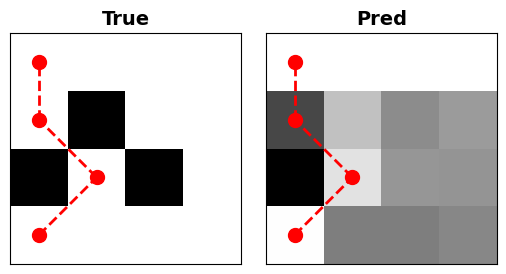

   INFO 2023-12-05 12:44:23: Training set row 1 with


INFO:__main__:Training set row 1 with


[[5 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]]


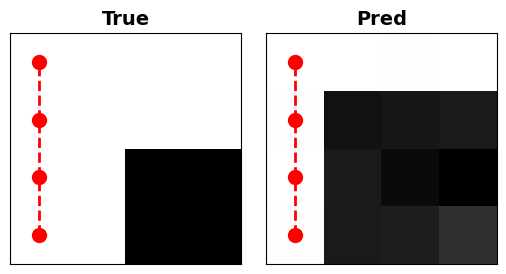

   INFO 2023-12-05 12:44:23: Training set row 2 with


INFO:__main__:Training set row 2 with


[[5 5]
 [1 1]
 [1 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


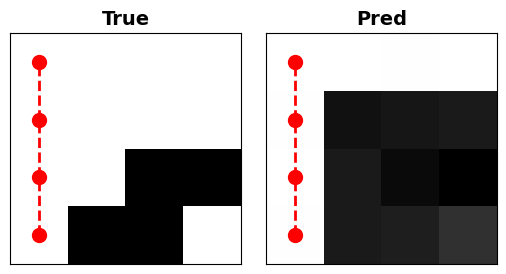

In [ ]:
##==========================================##
##  Plot some predictions on training data  ##
##==========================================##

num_print = min([3, len(train_X)])
print("train_X",train_X)
train_Y_predictions = model.predict(train_X[:num_print], verbose=0)
for row_idx in range(num_print) :
    logger.info(f"Training set row {row_idx} with")
    logger.debug(f"Y_TRUE =\n{train_Y[row_idx]}\n")
    logger.debug(f"Y_PRED =\n{train_Y_predictions[row_idx]}\n")
    plot_maps(train_Y[row_idx], train_Y_predictions[row_idx], train_X[row_idx])


   INFO 2023-12-05 12:44:24: Validationn set row 0 with


INFO:__main__:Validationn set row 0 with


val_Y_predictions[row_idx] [[4.9709971e-03 6.7004526e-01 5.2231014e-01 1.4889924e-04]
 [3.9183393e-01 1.3233639e-01 2.3981601e-01 1.0809698e-03]
 [3.9230692e-01 3.3380905e-01 3.5694697e-01 1.5286555e-03]
 [3.6975437e-01 3.3921766e-01 3.2365945e-01 1.6023070e-03]]
[[5 5]
 [1 1]
 [1 2]
 [2 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


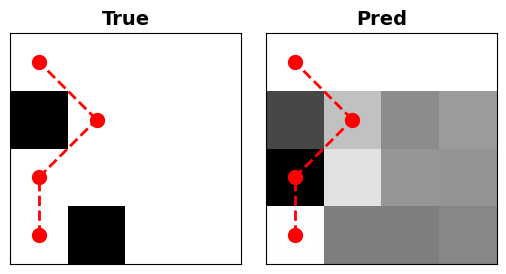

   INFO 2023-12-05 12:44:24: Validationn set row 1 with


INFO:__main__:Validationn set row 1 with


val_Y_predictions[row_idx] [[4.9709999e-03 6.7004412e-01 5.2231055e-01 1.4889910e-04]
 [3.9183345e-01 1.3233648e-01 2.3981643e-01 1.0809678e-03]
 [3.9230701e-01 3.3380884e-01 3.5694665e-01 1.5286512e-03]
 [3.6975399e-01 3.3921814e-01 3.2365987e-01 1.6023039e-03]]
[[5 5]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


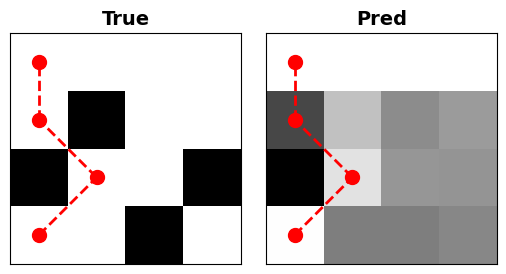

   INFO 2023-12-05 12:44:25: Validationn set row 2 with


INFO:__main__:Validationn set row 2 with


val_Y_predictions[row_idx] [[0.00622924 0.6574326  0.71707255 0.00078462]
 [0.23255065 0.37149328 0.5161397  0.00084139]
 [0.37781236 0.14081524 0.15043457 0.00133448]
 [0.38028848 0.2694026  0.27692857 0.00181957]]
[[5 5]
 [1 1]
 [2 1]
 [3 2]
 [2 3]
 [1 4]
 [6 6]
 [0 0]
 [0 0]
 [0 0]]
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]]


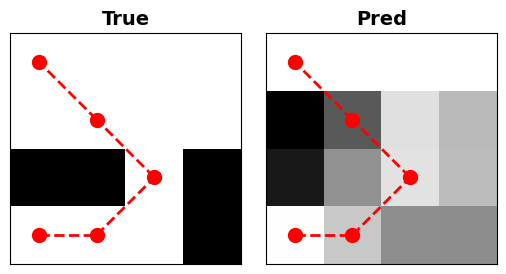

In [ ]:
##============================================##
##  Plot some predictions on validation data  ##
##============================================##

num_print = min([3, len(val_X)])
val_Y_predictions = model.predict(val_X[:num_print], verbose=0)
for row_idx in range(num_print) :
    logger.info(f"Validationn set row {row_idx} with")
    logger.debug(f"Y_TRUE =\n{val_Y[row_idx]}\n")
    logger.debug(f"Y_PRED =\n{val_Y_predictions[row_idx]}\n")
    print("val_Y_predictions[row_idx]",val_Y_predictions[row_idx])
    plot_maps(val_Y[row_idx], val_Y_predictions[row_idx], val_X[row_idx])